# Check Multiple Sclerosis for data release

## scRNA

data: `/backup/archived/msNewData/data_release`

* expr_csf_annot_clean_rc5.h5ad
* expr_csf_annot_clean_rc5_obs.csv

In [1]:
import numpy as np
import pandas as pd
import scanpy as sc
import matplotlib.pyplot as plt

In [2]:
adata = sc.read("/backup/archived/msNewData/data_release/expr_csf_annot_clean_rc5.noRaw.h5ad")
adata

AnnData object with n_obs × n_vars = 96732 × 25003
    obs: 'cell', 'batch', 'donorseq', 'patient_id', 'gender', 'tissue', 'affection', 'disease', 'active', 'treated', 'oligoclonal', 'celltype', 'celltype_finer'
    var: 'gene_ids', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'n_cells_by_counts'
    uns: 'affection_colors', 'celltype_colors', 'disease_colors', 'leiden', 'neighbors'
    obsm: 'X_mofa', 'X_umap'
    varm: 'LFs'
    obsp: 'connectivities', 'distances'

In [3]:
adata.obs

,cell,batch,donorseq,patient_id,gender,tissue,affection,disease,active,treated,oligoclonal,celltype,celltype_finer
cell_id,,,,,,,,,,,,,
S14618-G1-AAAGTAGCACGTTGGC,AAAGTAGCACGTTGGC-1-0,0,S14618-G1,Sample6,1,CSF,1,NIND,NaN,False,0.0,Macrophage,Macrophage
S14618-G1-AAGGAGCCATACGCCG,AAGGAGCCATACGCCG-1-0,0,S14618-G1,Sample6,1,CSF,1,NIND,NaN,False,0.0,CD4+ T cell,CD4+ T cell
S14618-G1-AATCGGTTCCGAATGT,AATCGGTTCCGAATGT-1-0,0,S14618-G1,Sample6,1,CSF,1,NIND,NaN,False,0.0,CD4+ T cell,CD4+ T cell
S14618-G1-ACACCAAAGTGCGTGA,ACACCAAAGTGCGTGA-1-0,0,S14618-G1,Sample6,1,CSF,1,NIND,NaN,False,0.0,CD8+ T cell,CD8+ T cell
S14618-G1-ACACCGGGTTCCACAA,ACACCGGGTTCCACAA-1-0,0,S14618-G1,Sample6,1,CSF,1,NIND,NaN,False,0.0,CD8+ T cell,CD8+ T cell
...,...,...,...,...,...,...,...,...,...,...,...,...,...
S14619-H3-TTTGGTTCAAAGGAAG,TTTGGTTCAAAGGAAG-1-83,83,S14619-H3,Sample17,1,CSF,2,MS,0.0,False,0.0,CD4+ T cell,CD4+ T cell
S14619-H3-TTTGGTTGTTTGTTTC,TTTGGTTGTTTGTTTC-1-83,83,S14619-H3,Sample17,1,CSF,2,MS,0.0,False,0.0,cDC2,cDC2
S14619-H3-TTTGTCAAGTTGAGTA,TTTGTCAAGTTGAGTA-1-83,83,S14619-H3,Sample17,1,CSF,2,MS,0.0,False,0.0,CD4+ T cell,CD4+ T cell


In [4]:
adata.obsp['connectivities'].astype(np.float32)

<Compressed Sparse Row sparse matrix of dtype 'float32'
	with 35393858 stored elements and shape (96732, 96732)>

### Quick visualization

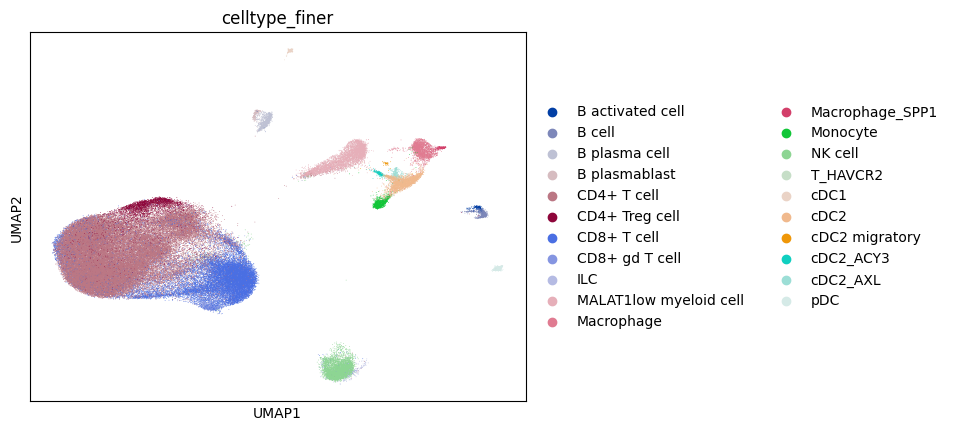

In [5]:
sc.pl.umap(adata, color=['celltype_finer'])

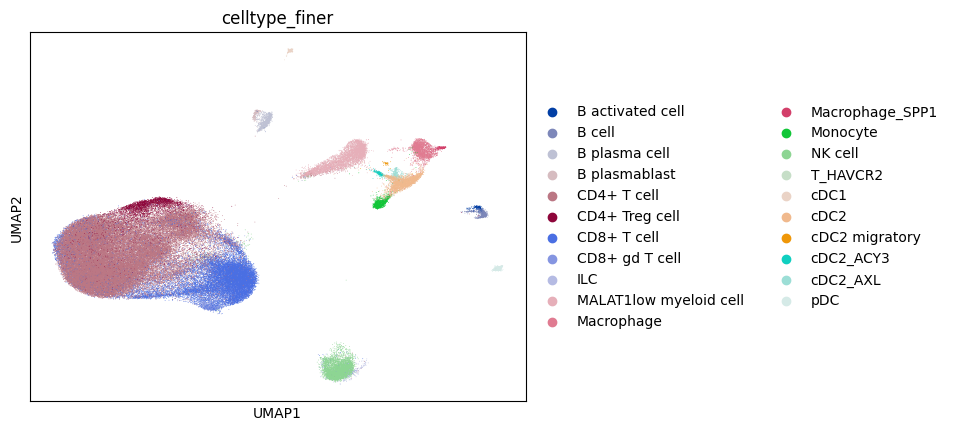

In [6]:
sc.pl.umap(adata, color=['celltype_finer'])

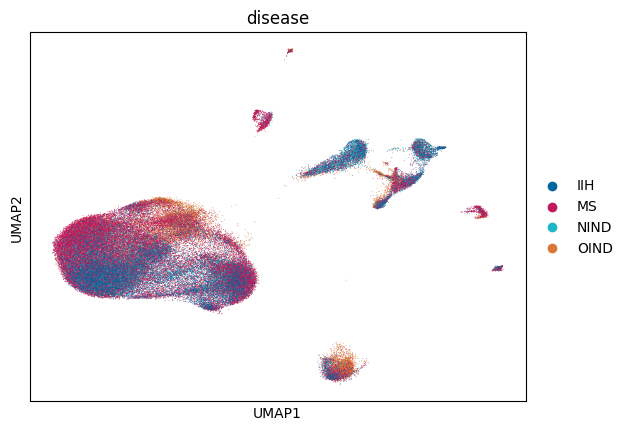

In [7]:
sc.pl.umap(adata, color='disease')

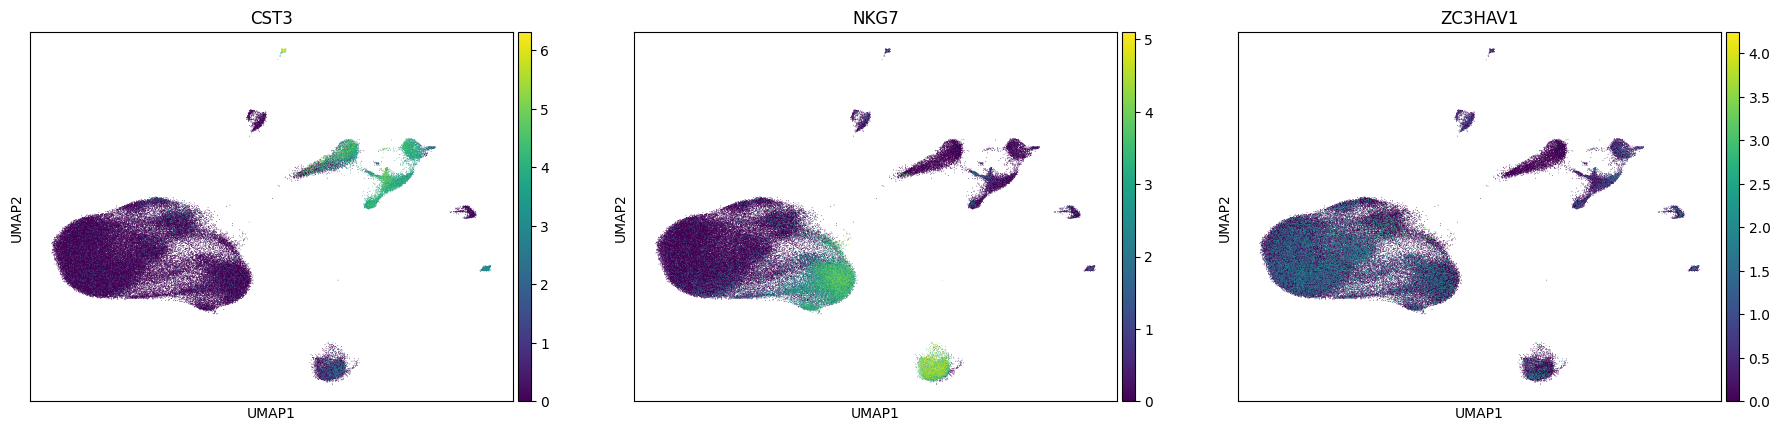

In [8]:
sc.pl.umap(adata, color=["CST3", "NKG7", "ZC3HAV1"])

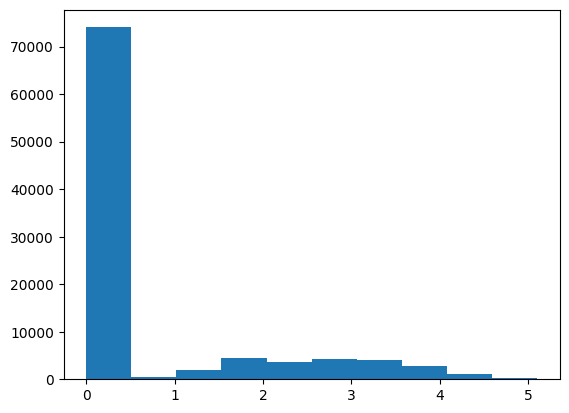

In [9]:
plt.hist(adata[:, 'NKG7'].X.toarray())
plt.show()

## Down sampling

downsample is available in scQTLib: https://github.com/huangyh09/scQTLib

Please install via `pip install -U git+https://github.com/huangyh09/scQTLib`

In [10]:
import scqtlib
from scqtlib.utils.base_utils import downsample
print(scqtlib.__version__)

np.random.seed(0)

x = list(adata.obs['patient_id'])
y = list(adata.obs['celltype'])
cell_labels = np.array([x[i] + '_' + y[i] for i in range(len(x))])

idx_keep = downsample(cell_labels, out_count=10000, balanced_out=True)

/ssd/users/yuanhua/envs/TFProb/lib/python3.11/site-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


0.1.3
min_count: 18. 503 out of 865 groups below it


In [11]:
adata_sub = adata[idx_keep, :]#[:, adata.var['highly_variable']]
adata_sub

View of AnnData object with n_obs × n_vars = 10000 × 25003
    obs: 'cell', 'batch', 'donorseq', 'patient_id', 'gender', 'tissue', 'affection', 'disease', 'active', 'treated', 'oligoclonal', 'celltype', 'celltype_finer'
    var: 'gene_ids', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'n_cells_by_counts'
    uns: 'affection_colors', 'disease_colors', 'leiden', 'neighbors', 'celltype_finer_colors'
    obsm: 'X_mofa', 'X_umap'
    varm: 'LFs'
    obsp: 'connectivities', 'distances'

In [12]:
# adata_sub.write_h5ad('/backup/archived/msNewData/data_release/expr_csf_annot_clean_rc5.sub10k.h5ad',
#                      compression='gzip')

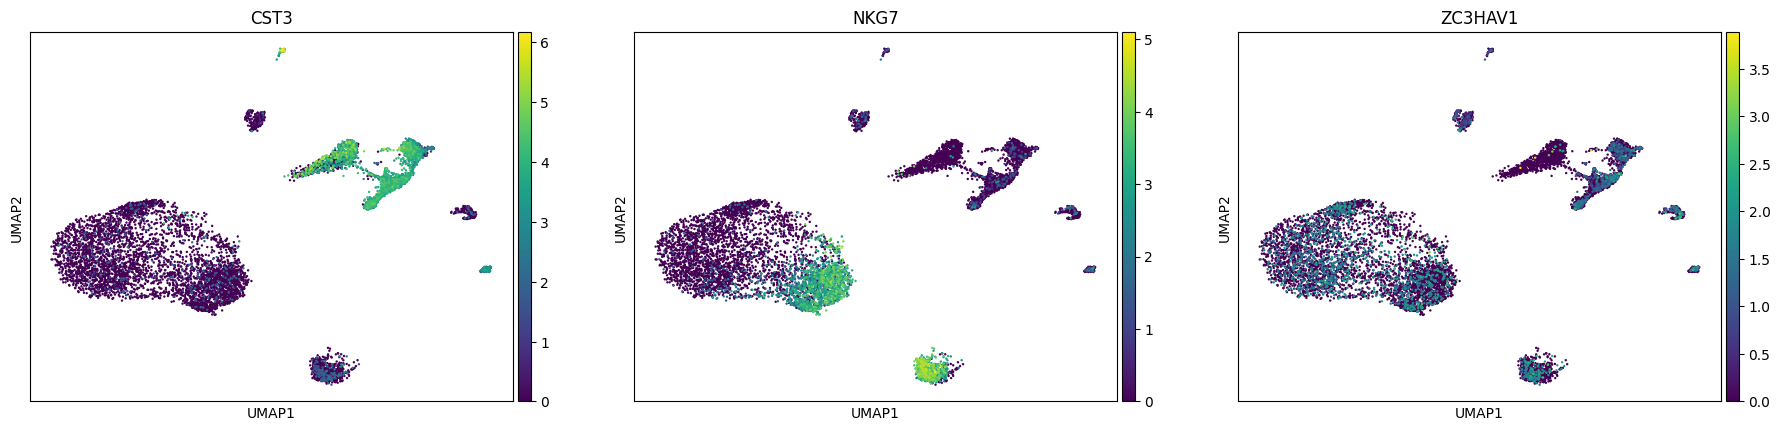

In [13]:
sc.pl.umap(adata_sub, color=["CST3", "NKG7", "ZC3HAV1"])

In [14]:
pd.DataFrame(adata_sub.obs[['cell', 'celltype', 'patient_id']].groupby(['patient_id']).size()).sort_values(by=[0])

/tmp/ipykernel_3883065/1769124074.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  pd.DataFrame(adata_sub.obs[['cell', 'celltype', 'patient_id']].groupby(['patient_id']).size()).sort_values(by=[0])


,0
patient_id,
Sample76,21
Sample72,22
Sample61,42
Sample77,50
Sample62,54
...,...
Sample73,198
Sample4,199
Sample28,204


#### Load data from sourceforge

Uncomment it to download the data to the current directory.

In [ ]:
# adata_sub = sc.read('expr_csf_annot_clean_rc5.sub10k.h5ad',
#     backup_url='https://sourceforge.net/projects/ms-csf-singlecell/files/expr_csf_annot_clean_rc5.sub10k.h5ad')

In [ ]:
# sc.pl.umap(adata_sub, color=["CST3", "NKG7", "ZC3HAV1"])

## Genetics

To change sample ids

`/backup/archived/archiveEBI/msclerosis/gwas`

* MS_SNPgene_adds.txt
* ms.SNPgene_MarcLis.geno.HRC.vcf.gz
* ms.SNPgene.geno.HRC.vcf.gz

Released data only using the 81 samples. 

The SNP-gene pairs are also on github:
https://github.com/huangyh09/MSclerosisSrc/blob/master/genetics/MS_GWAS_200SNPs_930genes.tsv

In [15]:
df1 = pd.read_csv('/backup/archived/archiveEBI/msclerosis/gwas/MS_SNPgene_adds.txt', sep = '\t')
df1

,Chr,SNP_ID,HG19,Gene_name,Gene_ID
0,1,rs3748817,2525665,AL139246.3,ENSG00000228037
1,1,rs3748817,2525665,AL139246.4,ENSG00000229393
2,1,rs3748817,2525665,AL139246.5,ENSG00000272449
3,1,rs3748817,2525665,AL831784.1,ENSG00000237058
4,1,rs3748817,2525665,FAM213B,ENSG00000157870
...,...,...,...,...,...
1005,17,.,38023745,ORMDL3,NaN
1006,6,.,31583155,AIF1,NaN
1007,6,.,32605884,HLA-DQB1,NaN
1008,6,.,32397309,HLA-DRB5,NaN


In [16]:
len(np.unique(df1['HG19'])), len(np.unique(df1['Gene_name']))

(200, 930)